<a href="https://colab.research.google.com/github/Ritam646/Handwritten-Digit-Recognition-using-Deep-Learning/blob/main/HandWdigitR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

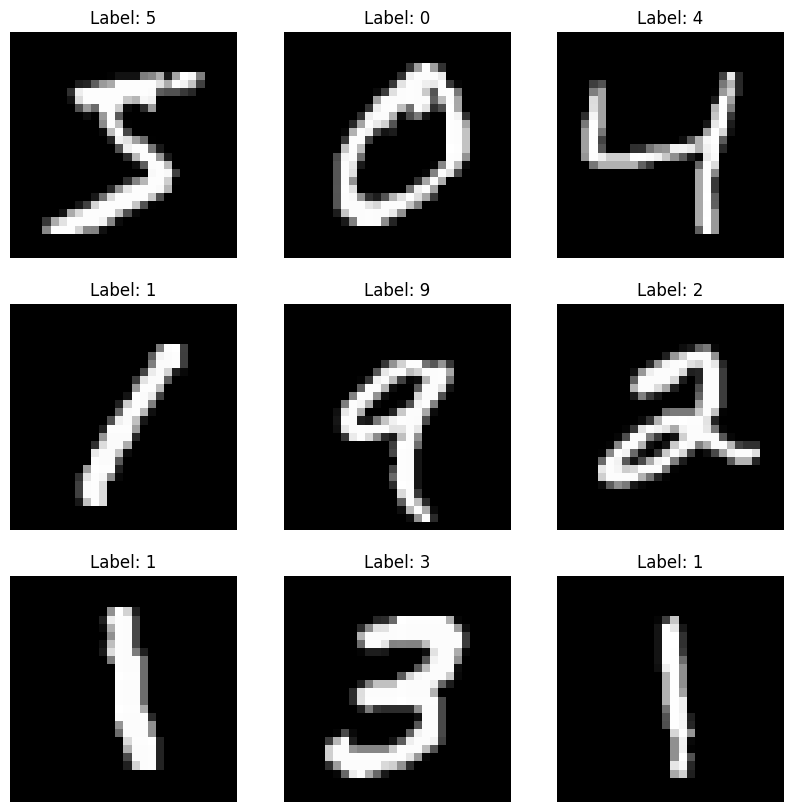

In [4]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
h = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8489 - loss: 0.4936 - val_accuracy: 0.9796 - val_loss: 0.0671
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0602 - val_accuracy: 0.9833 - val_loss: 0.0552
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9863 - loss: 0.0426 - val_accuracy: 0.9860 - val_loss: 0.0467
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9891 - val_loss: 0.0389
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9918 - loss: 0.0241 - val_accuracy: 0.9887 - val_loss: 0.0381


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9851 - loss: 0.0436
Test accuracy: 0.9894


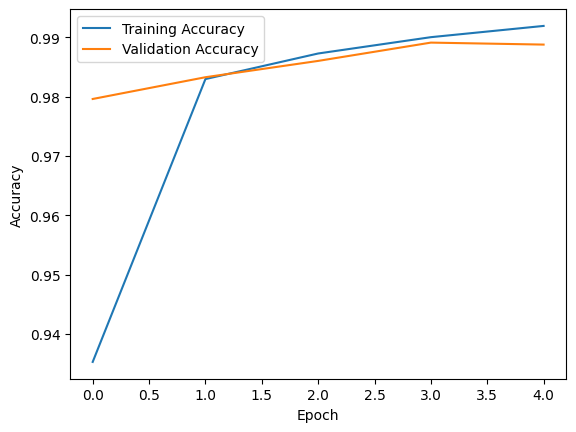

In [9]:
plt.plot(h.history['accuracy'], label='Training Accuracy')
plt.plot(h.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
test_predictions = model.predict(test_images)
test_predictions_labels = np.argmax(test_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


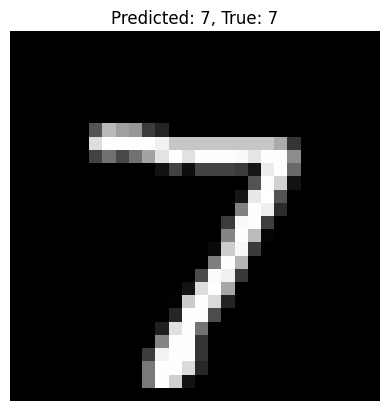

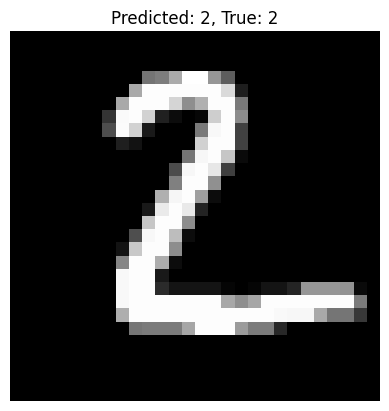

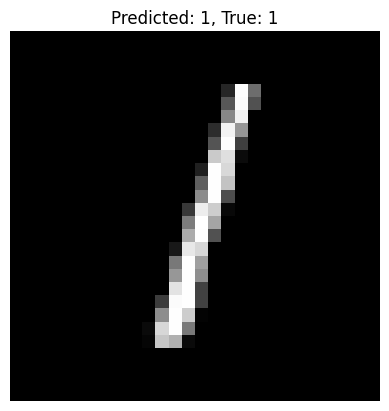

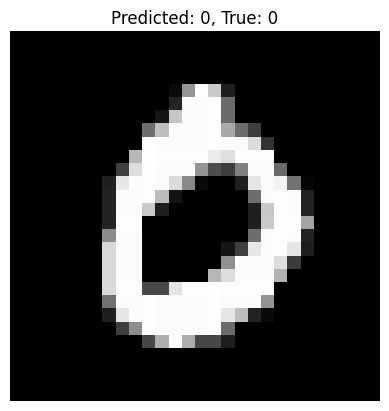

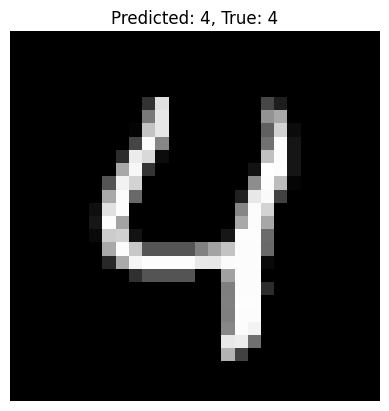

In [12]:
for i in range(5):
    test_predicted_label = np.argmax(test_predictions[i])
    true_label = test_labels[i]
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {test_predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

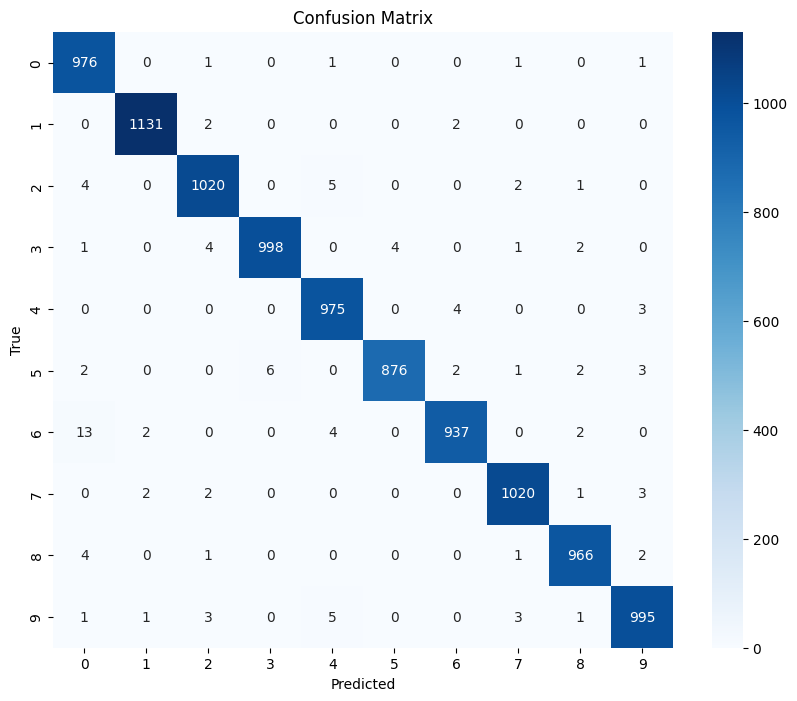

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
cm = confusion_matrix(test_labels, test_predictions_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
report = classification_report(test_labels, test_predictions_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", report)

In [16]:
from google.colab import drive

In [17]:
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
model_path = f'/content/drive/My Drive/Trained Model/mnist_digit_model.h5'
model.save(model_path)
print(f"Model saved at {model_path} and successfully")


Model saved at /content/drive/My Drive/Trained Model/mnist_digit_model.h5 and successfully


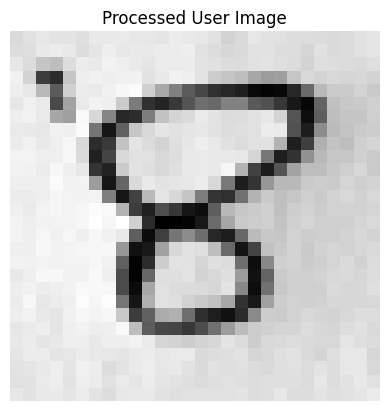

In [95]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/My Drive/Trained Model/mnist_digit_model.h5')

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array
image_path = '/content/hwrcd.jpg'

processed_image = preprocess_image(image_path)
plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title("Processed User Image")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Predicted Digit: 8
Prediction Probabilities: [0.06050488 0.02628716 0.10313421 0.09295246 0.03229225 0.08564484
 0.01902998 0.05806957 0.44082394 0.08126061]


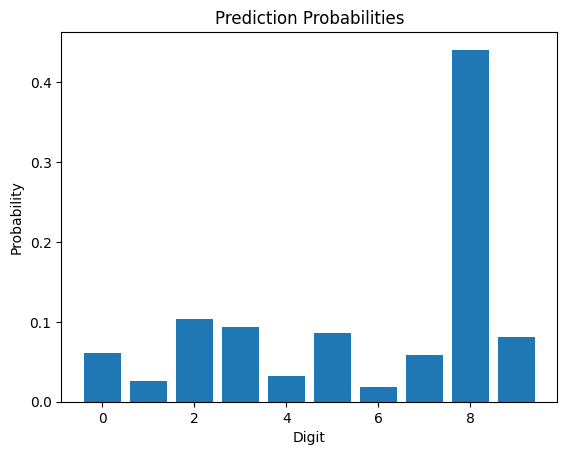

In [96]:

prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")
print(f"Prediction Probabilities: {prediction[0]}")
plt.bar(range(10), prediction[0])
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()

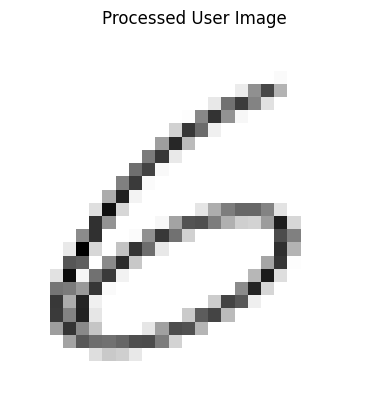

In [97]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/My Drive/Trained Model/mnist_digit_model.h5')

def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array
image_path = '/content/hwdR.jpg'

processed_image = preprocess_image(image_path)
plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title("Processed User Image")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Digit: 6
Prediction Probabilities: [0.11482719 0.0459399  0.04287259 0.08318082 0.03847575 0.08691087
 0.25844234 0.01660998 0.23656686 0.0761738 ]


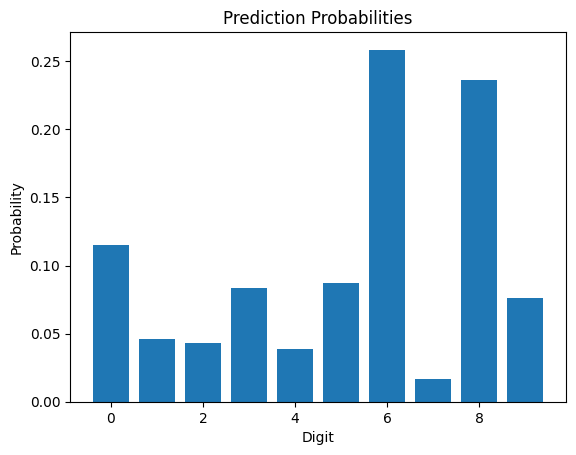

In [98]:
predictioned = model.predict(processed_image)
predicted_digit = np.argmax(predictioned)

print(f"Predicted Digit: {predicted_digit}")
print(f"Prediction Probabilities: {predictioned[0]}")
plt.bar(range(10), predictioned[0])
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Prediction Probabilities')
plt.show()